In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

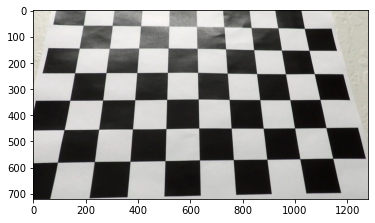

In [3]:
def calibrate_camera():
    objp_dict = {
        1: (9, 5),
        2: (9, 6),
        3: (9, 6),
        4: (9, 6),
        5: (9, 6),
        6: (9, 6),
        7: (9, 6),
        8: (9, 6),
        9: (9, 6),
        10: (9, 6),
        11: (9, 6),
        12: (9, 6),
        13: (9, 6),
        14: (9, 6),
        15: (9, 6),
        16: (9, 6),
        17: (9, 6),
        18: (9, 6),
        19: (9, 6),
        20: (9, 6),
    }
    
    objp_list = []
    corners_list = []
    
    for k in objp_dict:
        nx, ny = objp_dict[k]
        
        objp = np.zeros((nx*ny,3), np.float32)
        objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

        fname = 'camera_cal/calibration%s.jpg' % str(k)
        img = cv2.imread(fname)

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        if ret == True:
            objp_list.append(objp)
            corners_list.append(corners)
        else:
            print('Warning: ret = %s for %s' % (ret, fname))
    img = cv2.imread('test_images/straight_lines1.jpg')
    img_size = (img.shape[1], img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objp_list, corners_list, img_size,None,None)

    return mtx, dist


if __name__ == '__main__':
    mtx, dist = calibrate_camera()
    save_dict = {'mtx': mtx, 'dist': dist}
    with open('calibrate_camera.p', 'wb') as f:
        pickle.dump(save_dict, f)

    img = mpimg.imread('camera_cal/calibration3.jpg')
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    plt.imshow(dst)
    plt.savefig('output_images/undistort_calibration.png')
